<a href="https://colab.research.google.com/github/Modinat-A/CE888/blob/main/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customers 


In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [26]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [49]:
def bootstrap_mean(x, sample_size, n_bootstraps):
    samples = np.random.choice(x,[sample_size])
    data_mean = np.mean(samples)
    lower = np.percentile(samples,2.5)
    upper = np.percentile(samples,97.5)
    return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

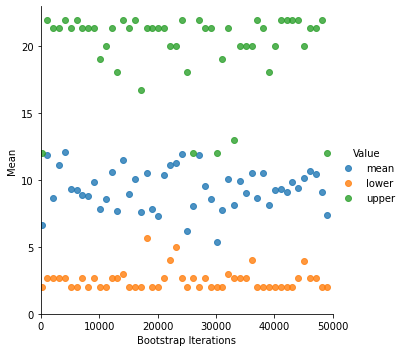

In [50]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

In [51]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
    ci = (100-ci)/2 
    samples = np.random.choice(sample, [sample_size])
    data_mean = np.mean(samples)
    lower = np.percentile(samples,ci)
    upper = np.percentile(samples,(100- ci))
    return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

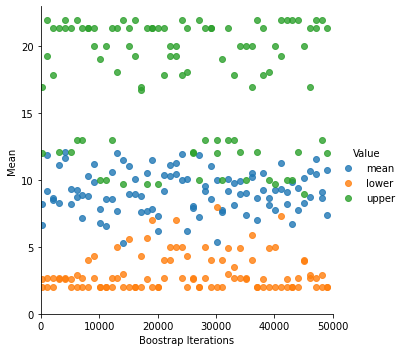

In [52]:
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


In [53]:
# Load and visualise the vehicles dataset
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
old_fleets = df.values.T[0]
new_fleets = df['New Fleet'].dropna().values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


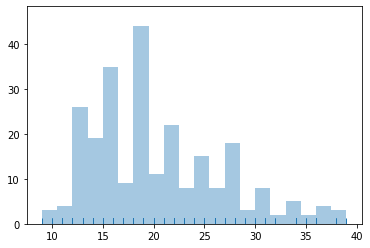

In [56]:
# visualise the vehicles old fleet
sns.distplot(old_fleets,bins = 20,kde=False,rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


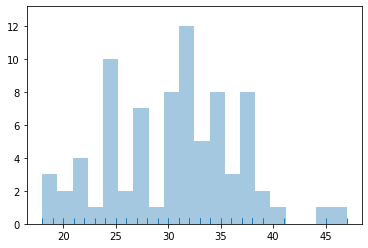

In [57]:
# visualise the vehicles old fleet
sns.distplot(new_fleets,bins = 20,kde=False,rug=True)

In [39]:
# show 73%  confidence interval with 10k permutations
mean, lower, upper = bootstrap_mean_ci(data, len(data), 10000, 73)
print(mean ,lower,upper)

5.259102895485705 2.0 10.734999999999998


Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.

1. Calculate the mean of both samples.

2. Using the bootstrap function that you created:

   *  Construct the 95% CI of the mean of the current fleet.
   *  Construct the 95% CI of the mean of the new fleet.
   *  Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [61]:
# show 95% and 85% confidence interval with 20k permutations
old_fleets_mean = np.mean(old_fleets)
new_fleets_mean = np.mean(new_fleets)

old_fleet_mean, lower, upper = bootstrap_mean_ci(old_fleets, len(old_fleets), 20000, 95)
new_fleet_mean, lower, upper = bootstrap_mean_ci(new_fleets, len(new_fleets), 20000, 95)


print(' 95% CI of the mean of the current fleet',old_fleet_mean)
print(' 95% CI of the mean of the new fleet',new_fleet_mean)

old_fleet_mean, lower, upper = bootstrap_mean_ci(old_fleets, len(old_fleets), 20000, 85)
new_fleet_mean, lower, upper = bootstrap_mean_ci(new_fleets, len(new_fleets), 20000, 85)


print(' 85% CI of the mean of the current fleet',old_fleet_mean)
print(' 85% CI of the mean of the new fleet',new_fleet_mean)

 95% CI of the mean of the current fleet 20.63855421686747
 95% CI of the mean of the new fleet 30.544303797468356
 85% CI of the mean of the current fleet 20.092369477911646
 85% CI of the mean of the new fleet 29.49367088607595


In [60]:
# show 85% confidence interval with 20k permutations
old_fleets_mean = np.mean(old_fleets)
new_fleets_mean = np.mean(new_fleets)

old_fleet_mean, lower, upper = bootstrap_mean_ci(old_fleets, len(old_fleets), 20000, 85)

new_fleet_mean, lower, upper = bootstrap_mean_ci(new_fleets, len(new_fleets), 20000, 85)


print(' 85% CI of the mean of the current fleet',old_fleet_mean)
print(' 85% CI of the mean of the new fleet',new_fleet_mean)

 85% CI of the mean of the current fleet 20.502008032128515
 85% CI of the mean of the new fleet 29.772151898734176


In [41]:
def permut_test(sample1, sample2, n_permutations):
    concat = np.concatenate((sample1,sample2))
    test_obs = np.mean(sample2) - np.mean(sample1)
    count = 0
    for i in range(0,n_permutations):
        perm = np.random.permutation(concat)
        perm1 = perm[:int(len(perm)/2)]
        perm2 = perm[int(len(perm)/2):]
        test_perm = np.mean(perm2) - np.mean(perm1)
        count +=  test_perm > test_obs
    pvalue = count/n_permutations
    return pvalue

p_value = permut_test(new_fleets,old_fleets, 30000)
print('if ', p_value, ' > 0.05, we have failed to reject the null hypothesis')

if  1.0  > 0.05, we have failed to reject the null hypothesis


In [42]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]

In [43]:
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [44]:
print(len(dem_share_OH))
print(len(dem_share_PA))

88
67


In [45]:
mean, lower, upper = bootstrap_mean_ci(dem_share_PA, len(dem_share_PA), 100000, 98)
print(lower,upper)

26.6468 60.598800000000004


In [47]:
mean, lower, upper = bootstrap_mean_ci(dem_share_OH, len(dem_share_OH), 100000, 98)
print(lower,upper)

99.0
27.92 69.64


In [48]:
p_value = permut_test(dem_share_OH,dem_share_PA, 30000)
print('if ', p_value, ' > 0.05, we have failed to reject the null hypothesis')

if  0.23036666666666666  > 0.05, we have failed to reject the null hypothesis
